<a href="https://colab.research.google.com/github/AdityaPatki77/Stock-Price-Predection/blob/main/Stock_Price_Prediction_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv("gdrive/MyDrive/NFLXE.csv")


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
1,2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900
2,2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100
3,2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200
4,2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       956 non-null    object 
 1   Open       956 non-null    float64
 2   High       956 non-null    float64
 3   Low        956 non-null    float64
 4   Close      956 non-null    float64
 5   Adj Close  956 non-null    float64
 6   Volume     956 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 52.4+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,956.000000,956.000000,956.000000,956.000000,956.000000,9.560000e+02
mean,418.366433,425.035951,411.647072,418.426381,418.426381,7.151453e+06
std,123.874198,124.413941,122.786856,123.515358,123.515358,6.888549e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,331.692505,336.687508,327.442497,332.112511,332.112511,3.865525e+06
50%,425.000000,429.945007,417.720001,425.244995,425.244995,5.532350e+06
75%,512.642517,519.064972,504.527504,512.902496,512.902496,8.074225e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [ ]:
data.shape

(956, 7)

In [ ]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.count()

Date         956
Open         956
High         956
Low          956
Close        956
Adj Close    956
Volume       956
dtype: int64

In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
data.nunique()

Date         956
Open         934
High         942
Low          942
Close        946
Adj Close    946
Volume       948
dtype: int64

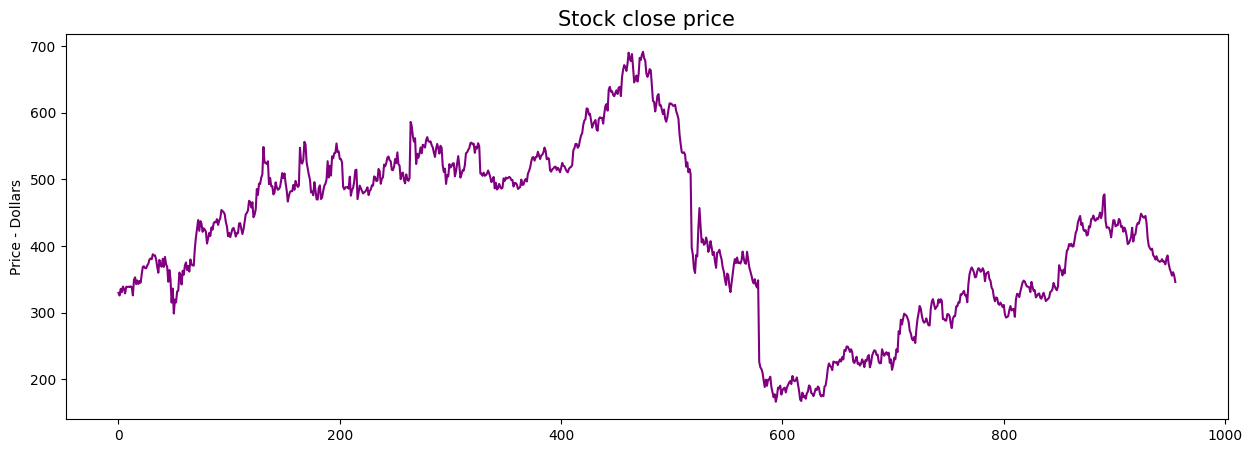

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(data['Close'], color = "purple")
plt.title("Stock close price", fontsize = 15)
plt.ylabel("Price - Dollars")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split as tts

data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])

data_test = pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

print(data_train.shape)
print(data_test.shape)

(669, 1)
(287, 1)


In [ ]:
data_train.head()

,Close
0,329.809998
1,325.899994
2,335.829987
3,330.750000
4,339.260010


In [ ]:
data_test.head()

,Close
669,224.570007
670,220.649994
671,223.559998
672,230.039993
673,226.110001


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scalar = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_arr = scalar.fit_transform(data_train)

In [ ]:
data_train_arr.shape

(669, 1)

In [ ]:
x_train = [data_train_arr[i - 100:i] for i in range(100, data_train_arr.shape[0])]

y_train = [data_train_arr[i,0] for i in range(100, data_train_arr.shape[0])]

x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape)
print(y_train.shape)

(569, 100, 1)
(569,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

model = Sequential()

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_9 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_10 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_11 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 120)             

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = model.fit(x_train,y_train, epochs = 50, batch_size = 32, verbose = 2 )

Epoch 1/50
18/18 - 14s - loss: 0.1898 - 14s/epoch - 772ms/step
Epoch 2/50
18/18 - 7s - loss: 0.0604 - 7s/epoch - 398ms/step
Epoch 3/50
18/18 - 5s - loss: 0.0333 - 5s/epoch - 275ms/step
Epoch 4/50
18/18 - 6s - loss: 0.0240 - 6s/epoch - 306ms/step
Epoch 5/50
18/18 - 7s - loss: 0.0194 - 7s/epoch - 378ms/step
Epoch 6/50
18/18 - 5s - loss: 0.0166 - 5s/epoch - 272ms/step
Epoch 7/50
18/18 - 7s - loss: 0.0194 - 7s/epoch - 402ms/step
Epoch 8/50
18/18 - 5s - loss: 0.0168 - 5s/epoch - 274ms/step
Epoch 9/50
18/18 - 5s - loss: 0.0177 - 5s/epoch - 297ms/step
Epoch 10/50
18/18 - 7s - loss: 0.0172 - 7s/epoch - 396ms/step
Epoch 11/50
18/18 - 5s - loss: 0.0145 - 5s/epoch - 276ms/step
Epoch 12/50
18/18 - 7s - loss: 0.0150 - 7s/epoch - 400ms/step
Epoch 13/50
18/18 - 5s - loss: 0.0139 - 5s/epoch - 276ms/step
Epoch 14/50
18/18 - 5s - loss: 0.0139 - 5s/epoch - 293ms/step
Epoch 15/50
18/18 - 7s - loss: 0.0138 - 7s/epoch - 387ms/step
Epoch 16/50
18/18 - 5s - loss: 0.0131 - 5s/epoch - 279ms/step
Epoch 17/50
18/

In [ ]:
data_test.head()

,Close
669,224.570007
670,220.649994
671,223.559998
672,230.039993
673,226.110001


In [ ]:
data_train.tail()

,Close
664,226.539993
665,224.550003
666,229.610001
667,233.979996
668,223.279999


In [ ]:
prev_100_days = data_train.tail()

In [ ]:
final_data = prev_100_days.append(data_test, ignore_index=True)

<ipython-input-157-54eb1f005f33>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = prev_100_days.append(data_test, ignore_index=True)


In [ ]:
input_data = scalar.fit_transform(final_data)
input_data

array([[0.04652488],
       [0.038967  ],
       [0.05818461],
       [0.07478163],
       [0.03414358],
       [0.03904297],
       [0.02415496],
       [0.03520701],
       [0.0598177 ],
       [0.04489179],
       [0.01557161],
       [0.05571597],
       [0.04994306],
       [0.07322451],
       [0.08446641],
       [0.01458417],
       [0.03733385],
       [0.08009879],
       [0.09813905],
       [0.11143187],
       [0.10846947],
       [0.0857577 ],
       [0.08644136],
       [0.04603118],
       [0.037144  ],
       [0.03824538],
       [0.11739462],
       [0.09654392],
       [0.08032666],
       [0.09399924],
       [0.1004558 ],
       [0.08522599],
       [0.09772127],
       [0.03972657],
       [0.05958983],
       [0.        ],
       [0.02499051],
       [0.06919864],
       [0.05966581],
       [0.11701486],
       [0.10091154],
       [0.22062291],
       [0.20459556],
       [0.28590966],
       [0.25886828],
       [0.29141662],
       [0.32028105],
       [0.313

In [ ]:
input_data.shape

(292, 1)

In [ ]:
x_test = [input_data[i - 100:i] for i in range(100, input_data.shape[0])]

y_test = [input_data[i,0] for i in range(100, input_data.shape[0])]

x_test, y_test = np.array(x_test), np.array(y_test)

# x_test = []
# y_test = []

# for i in range(100,input_data.shape[0]):
#     x_test.append(input_data[i-100:i])
#     y_test.append(input_data[i,0])

# x_test,y_test = np.array(x_test), np.array(y_test)
# print(x_test.shape)
# print(y_test.shape)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(192, 100, 1)
(192,)


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)

6/6 [==============================] - 1s 88ms/step
(192, 1)


In [ ]:
y_test

array([0.45017096, 0.42510447, 0.42552219, 0.38545387, 0.48693508,
       0.54360053, 0.56794528, 0.58363083, 0.57189518, 0.55632356,
       0.52723126, 0.53007972, 0.56095707, 0.57956711, 0.57580706,
       0.55902019, 0.56460318, 0.57933913, 0.56289406, 0.50539305,
       0.54796814, 0.55324723, 0.55879232, 0.5181162 , 0.50767184,
       0.46794533, 0.45799472, 0.41534371, 0.39065704, 0.412989  ,
       0.40957087, 0.37671864, 0.37064189, 0.38317508, 0.37121156,
       0.35769087, 0.37030009, 0.31709079, 0.29802513, 0.30087359,
       0.30630463, 0.3399165 , 0.3637296 , 0.33881506, 0.34500574,
       0.3475124 , 0.30235473, 0.40288644, 0.43334607, 0.43057353,
       0.41484996, 0.44717055, 0.4714774 , 0.49825301, 0.50888722,
       0.50307636, 0.48636541, 0.47489553, 0.47360424, 0.47064184,
       0.4433726 , 0.50094952, 0.47223703, 0.44979114, 0.45351317,
       0.4133308 , 0.42180027, 0.4317889 , 0.43573868, 0.41116595,
       0.40584884, 0.42369925, 0.43919483, 0.41712875, 0.39217

In [ ]:
y_pred

array([[0.25439695],
       [0.29385185],
       [0.3308552 ],
       [0.36338943],
       [0.38926888],
       [0.4080817 ],
       [0.42155135],
       [0.4321652 ],
       [0.44224107],
       [0.4530124 ],
       [0.46463287],
       [0.47642648],
       [0.4875598 ],
       [0.49772182],
       [0.5070658 ],
       [0.5157759 ],
       [0.5237626 ],
       [0.53095245],
       [0.5374714 ],
       [0.5432564 ],
       [0.5473955 ],
       [0.5497192 ],
       [0.55051434],
       [0.55034447],
       [0.5492005 ],
       [0.5468717 ],
       [0.54249674],
       [0.5354214 ],
       [0.52470565],
       [0.5096978 ],
       [0.49081933],
       [0.4690191 ],
       [0.44516465],
       [0.41998014],
       [0.39358765],
       [0.36667758],
       [0.3409416 ],
       [0.318904  ],
       [0.3011855 ],
       [0.2869241 ],
       [0.27506986],
       [0.26507246],
       [0.2581596 ],
       [0.25646424],
       [0.2600523 ],
       [0.26821566],
       [0.27982333],
       [0.292

In [ ]:
scalar.scale_

array([0.00379795])

In [ ]:
scale_factor = 1/0.00379795

y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

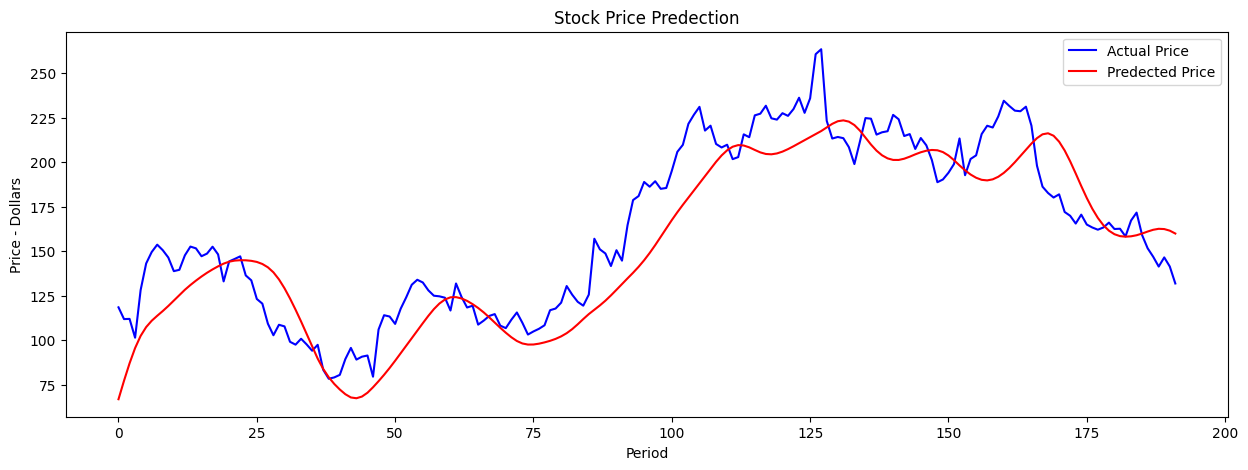

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(y_test,'blue',label = 'Actual Price')
plt.plot(y_pred,'red',label = 'Predected Price')
plt.title('Stock Price Predection')
plt.xlabel('Period')
plt.ylabel('Price - Dollars')
plt.legend()
plt.show()

In [ ]:
# END